In [2]:
!pip install xgboost


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from xgboost import XGBRegressor 
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight') # لخلفية الرسمة 
clolor_pal=sns.color_palette() # لاختيار منها الالوان

In [23]:
data=pd.read_csv(r'C:\Users\hp\Downloads\PJME_hourly.csv')

In [24]:
data.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [25]:
data.tail()

,Datetime,PJME_MW
145361,2018-01-01 20:00:00,44284.0
145362,2018-01-01 21:00:00,43751.0
145363,2018-01-01 22:00:00,42402.0
145364,2018-01-01 23:00:00,40164.0
145365,2018-01-02 00:00:00,38608.0


In [26]:
data.sample()

,Datetime,PJME_MW
70101,2009-01-01 14:00:00,34108.0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [28]:
data=data.set_index('Datetime')

In [31]:
data.index=pd.to_datetime(data.index)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJME_MW  145366 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


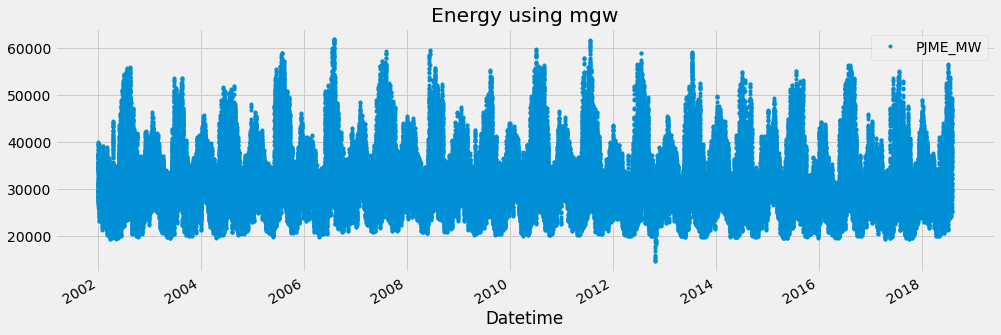

In [32]:
data.plot(figsize=(15,5),style='.',color=clolor_pal[0], title="Energy using mgw")
plt.show()

In [36]:
data["hour"]=data.index.hour
data["dayofweek"]=data.index.dayofweek
data["month"]=data.index.month
data["quarter"]=data.index.quarter
data["year"]=data.index.year
data["dayofyear"]=data.index.dayofyear

In [37]:
data

,PJME_MW,hour,dayofweek,month,quarter,year,dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,12,4,2002,365
2002-12-31 02:00:00,25147.0,2,1,12,4,2002,365
2002-12-31 03:00:00,24574.0,3,1,12,4,2002,365
2002-12-31 04:00:00,24393.0,4,1,12,4,2002,365
2002-12-31 05:00:00,24860.0,5,1,12,4,2002,365
...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,0,1,1,2018,1
2018-01-01 21:00:00,43751.0,21,0,1,1,2018,1
2018-01-01 22:00:00,42402.0,22,0,1,1,2018,1


Text(0.5, 1.0, 'Energy usage by hour')

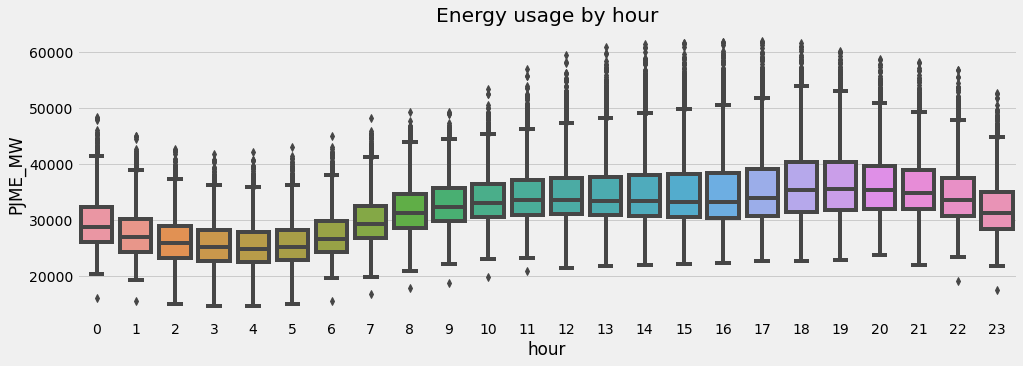

In [39]:
plt.subplots(figsize=(15,5))
sns. boxplot (data=data, x= 'hour' ,y= 'PJME_MW') 
plt.title('Energy usage by hour')

Text(0.5, 1.0, 'Energy usage by month')

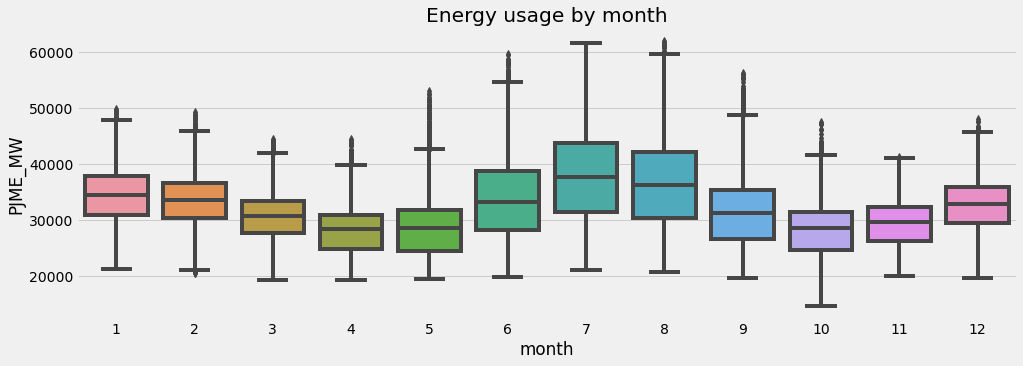

In [43]:
plt.subplots(figsize= (15,5))
sns.boxplot (data=data, x='month',y='PJME_MW')
plt.title('Energy usage by month')

Text(0.5, 1.0, 'Energy usage by quarter')

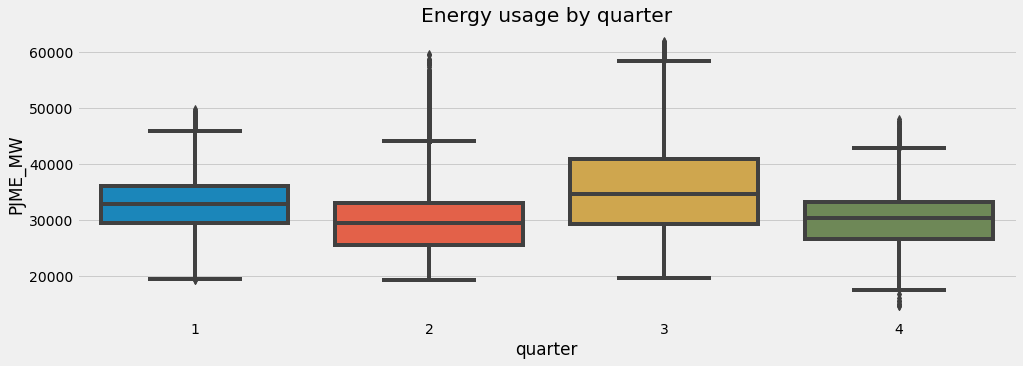

In [44]:
plt.subplots (figsize= (15,5))
sns.boxplot (data=data,x='quarter',y='PJME_MW') 
plt.title('Energy usage by quarter')

In [46]:
train_set=data.loc[data.index<'01-01-2015']
test_set=data.loc[data.index>='01-01-2015']

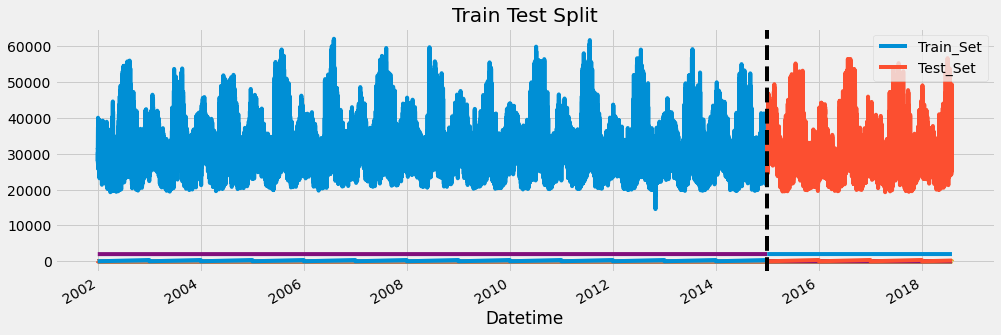

In [49]:
fig,ax=plt.subplots(figsize=(15,5))
train_set.plot(ax=ax)
test_set.plot(ax=ax)
ax.axvline('01-01-2015', color='Black',ls='--') #v=vector  to do line split between train and test
plt.legend(['Train_Set', 'Test_Set']) 
plt.title('Train Test Split') 
plt.show()

In [50]:
data

,PJME_MW,hour,dayofweek,month,quarter,year,dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,12,4,2002,365
2002-12-31 02:00:00,25147.0,2,1,12,4,2002,365
2002-12-31 03:00:00,24574.0,3,1,12,4,2002,365
2002-12-31 04:00:00,24393.0,4,1,12,4,2002,365
2002-12-31 05:00:00,24860.0,5,1,12,4,2002,365
...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,0,1,1,2018,1
2018-01-01 21:00:00,43751.0,21,0,1,1,2018,1
2018-01-01 22:00:00,42402.0,22,0,1,1,2018,1


In [54]:
x_train=train_set.drop('PJME_MW', axis=1) 
y_train=train_set['PJME_MW']

X_test=test_set.drop('PJME_MW',axis=1)
y_test=test_set['PJME_MW']

In [55]:
x_train

,hour,dayofweek,month,quarter,year,dayofyear
Datetime,,,,,,
2002-12-31 01:00:00,1,1,12,4,2002,365
2002-12-31 02:00:00,2,1,12,4,2002,365
2002-12-31 03:00:00,3,1,12,4,2002,365
2002-12-31 04:00:00,4,1,12,4,2002,365
2002-12-31 05:00:00,5,1,12,4,2002,365
...,...,...,...,...,...,...
2014-01-01 20:00:00,20,2,1,1,2014,1
2014-01-01 21:00:00,21,2,1,1,2014,1
2014-01-01 22:00:00,22,2,1,1,2014,1


In [56]:
y_train

Datetime
2002-12-31 01:00:00    26498.0
2002-12-31 02:00:00    25147.0
2002-12-31 03:00:00    24574.0
2002-12-31 04:00:00    24393.0
2002-12-31 05:00:00    24860.0
                        ...   
2014-01-01 20:00:00    36193.0
2014-01-01 21:00:00    35601.0
2014-01-01 22:00:00    34242.0
2014-01-01 23:00:00    32215.0
2014-01-02 00:00:00    30159.0
Name: PJME_MW, Length: 113926, dtype: float64

In [57]:
X_test

,hour,dayofweek,month,quarter,year,dayofyear
Datetime,,,,,,
2015-01-01 00:00:00,0,3,1,1,2015,1
2015-12-31 01:00:00,1,3,12,4,2015,365
2015-12-31 02:00:00,2,3,12,4,2015,365
2015-12-31 03:00:00,3,3,12,4,2015,365
2015-12-31 04:00:00,4,3,12,4,2015,365
...,...,...,...,...,...,...
2018-01-01 20:00:00,20,0,1,1,2018,1
2018-01-01 21:00:00,21,0,1,1,2018,1
2018-01-01 22:00:00,22,0,1,1,2018,1


In [58]:
y_test

Datetime
2015-01-01 00:00:00    32802.0
2015-12-31 01:00:00    24305.0
2015-12-31 02:00:00    23156.0
2015-12-31 03:00:00    22514.0
2015-12-31 04:00:00    22330.0
                        ...   
2018-01-01 20:00:00    44284.0
2018-01-01 21:00:00    43751.0
2018-01-01 22:00:00    42402.0
2018-01-01 23:00:00    40164.0
2018-01-02 00:00:00    38608.0
Name: PJME_MW, Length: 31440, dtype: float64

In [59]:
model=XGBRegressor(n_estimator=1000, early_stopping_round=50)

In [60]:
model.fit(x_train,y_train)

[03:02:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "early_stopping_round", "n_estimator" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_round=50,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimator=1000, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [61]:
model.score(x_train,y_train)

0.9339877047391292

In [63]:
pre=model.predict(X_test)

In [64]:
mean_squared_error(pre,y_test)

18337906.9949062

In [65]:
np.sqrt(mean_squared_error (pre,y_test))

4282.278248188247